In [1]:
from helper_functions import HelperFunction
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

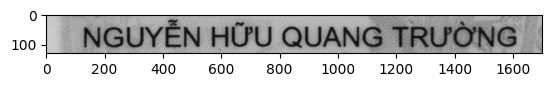

In [2]:
image = cv2.imread("croped_Name.jpg")
plt.imshow(image)

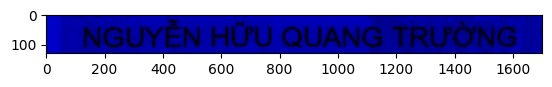

In [3]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_image)

Otsu Threshold : 102.0


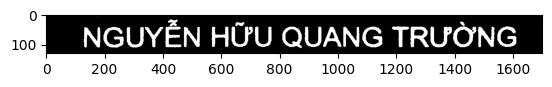

In [4]:
mask_hsv = HelperFunction.SegmentByThresh(image = image, channel= image[:,:,1],display=0)
plt.imshow(mask_hsv,cmap="gray")


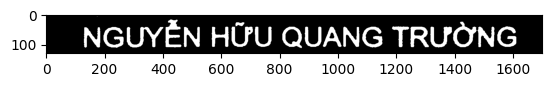

In [5]:
img_match,mask = HelperFunction.Morphology(image,mask_hsv,"closing",display=0)
plt.imshow(img_match,cmap = "gray")

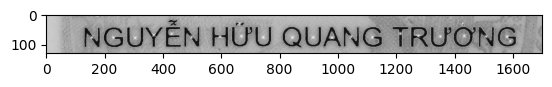

In [11]:
img_mask_label = HelperFunction.LabelObjectByMask(image,mask_hsv,type="Boundary",color=(255,255,255))
plt.imshow(img_mask_label,cmap = "gray")

In [8]:
from skimage import measure
from skimage.measure import label, regionprops
from skimage.segmentation import mark_boundaries

image_input = image.copy()
Marker_Size = int(image_input.shape[0] * 0.1)
Marker_Thick = int(image_input.shape[0] * 0.01)
BBoxThick = int(image_input.shape[0] * 0.01)
ContourThick = int(image_input.shape[0] * 0.01)

image_output = image.copy()
color = (0,255,0)
type = 
label_img = label(mask_hsv)
regions = regionprops(label_img)
for props in regions:
    minr, minc, maxr, maxc = props.bbox
    left_top = (minc, minr)
    right_bottom = (maxc, maxr)
    at_row, at_col = props.centroid

    if(type == "BBox"):
        cv2.rectangle(image_output,left_top, right_bottom, color ,BBoxThick)

    if(type == "Boundary"):
        contours, heirarchy = cv2.findContours(mask_hsv.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        cv2.drawContours(image_output, contours, -1, color, ContourThick)
        cv2.drawMarker(image_output, (int(at_col), int(at_row)),color, markerType=cv2.MARKER_STAR, 
                        markerSize= Marker_Size, thickness= Marker_Thick, line_type=cv2.LINE_AA)
    
    if(type == "Fill"):
        image_output[mask_hsv > 0] = color

list

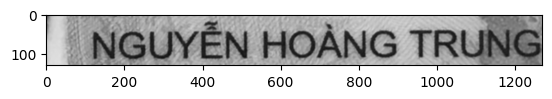

In [28]:
import cv2
import numpy as np

# Đọc hình ảnh chứa text
img = cv2.imread('croped_Name.jpg')

# Chuyển đổi sang ảnh grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Áp dụng thresholding
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
# Tìm tất cả các contour trong ảnh
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Tính toán bounding box cho từng contour
x_min, y_min, x_max, y_max = img.shape[1], img.shape[0], 0, 0
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if x < x_min:
        x_min = x
    if x + w > x_max:
        x_max = x + w

# Vẽ bounding box bao gồm tất cả các contour bên trong
# cv2.rectangle(img, (x_min, 0), (x_max, img.shape[0]), (0, 255, 0), 2)

plt.imshow(img[:,x_min:x_max,],cmap = "gray")


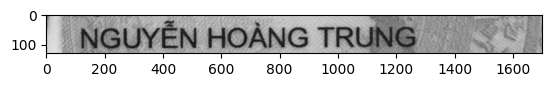

In [27]:
plt.imshow(img,cmap = "gray")

In [31]:
import json

# Khởi tạo dictionary chứa tiếng Việt
data = {
    'tên': 'Nguyễn Văn A',
    'tuổi': 25,
    'nghề nghiệp': 'Lập trình viên'
}

# Ghi dictionary vào file JSON
with open('data.json', 'w') as outfile:
    json.dump(data, outfile, ensure_ascii=False, indent=4)


In [32]:
a = "a.ghj.dfs"
x,c,v = a.split(".")
a = a.replace(f".{c}","")
a

'a.dfs'